In [29]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

In [30]:
try:
    os.chdir("./Resources")
except:
    pass

y, sr = librosa.load("./and-kick-snare.wav", duration=1, offset=7.5)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

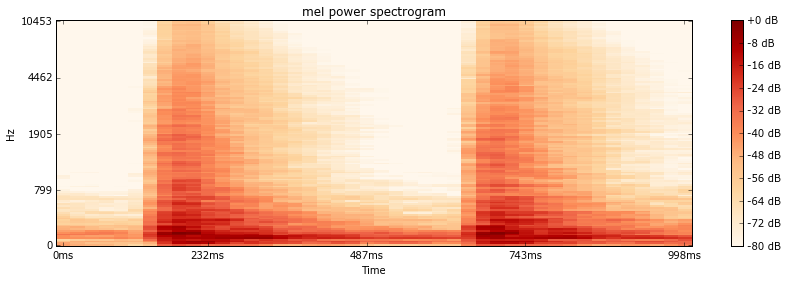

In [31]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [32]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 45.0, 0.0, 21.823156281218758)

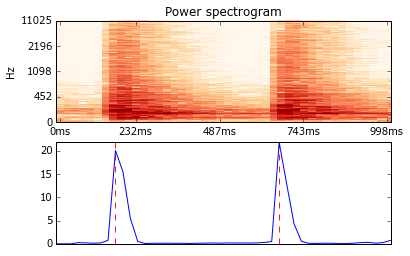

In [33]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [34]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[ 0.02149477  0.72255099  1.11066675 ...,  0.00437075  0.00496145
  0.0076067 ]
[ 0.00663521  0.02001765  0.82480305 ...,  0.09445522  0.08044473
  0.0598935 ]


In [37]:
filename = raw_input()

plusSnareKick.csv


In [38]:
with open('../data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 